# Problem Statement 
 
The main objective of this report is to find two primary evaluation measures for a chatbot framework, which are dependent on a range of tech and business parameters. The target variables are, namely, TARGET_Capacity, which is a measure of the framework's duration of holding a substantial conversation. The second target variable, TARGET_CaseCount, is the measure of the frequency of AI tasks that can be run simultaneously.

## 🔍 Now Starting Exploratory Data Analysis (EDA)

##### The necessary libraries are imported using the import statements below.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



The primary statistics (mean, count, median) for each column, including the target column, were calculated to gain a better understanding of the dataset. Additionally, checks for missing values were conducted across all columns. No missing values were found in any of the columns.


In [165]:

sns.set(font_scale=1.2)
data = pd.read_csv('Data.csv')
print("Dataset shape:", data.shape)
print("\nData types:")
print(data.dtypes)
print(data.describe())

print("\nMissing values:")
print(data.isnull().sum())
print("\nTARGET_Capacity Statistics:")
print(data['TARGET_Capacity'].describe())
print("\nTARGET_CaseCount Statistics:")
print(data['TARGET_CaseCount'].describe())

Dataset shape: (2071, 26)

Data types:
RecordID                      int64
TARGET_Capacity             float64
TARGET_CaseCount              int64
Country                       int64
Year                          int64
Status                        int64
SystemFailureRate             int64
ModelFailureRate-T            int64
ModelFailureRate-NT           int64
InferenceLatency              int64
ComputeUtilizationRate      float64
AIInfraExpPercent           float64
SecurityBreachIncidents       int64
IntegrationEfficiency       float64
UptimeReliabilityIndex        int64
AILearningStability           int64
AIDevExpPercent             float64
PatchCoverageRate           float64
SystemVulnerabilityScore    float64
GlobalAdoptionIndex         float64
ActiveUserBase                int64
TeenQueryEfficiency         float64
ChildQueryEfficiency        float64
FundingDiversityIndex       float64
DatasetDiversityScore       float64
Complexity                  float64
dtype: object
          R


- Histograms to understand the target variables better are created. The distribution of both target variables appears normally distributed, with the highest frequency around 200 at around 70-80 for Capacity and 35-40 for CaseCount, respectively. 
- However, the Capacity variable has data points with values ranging from 40 to 90, while the CaseCount variable ranges from 0 to 50.



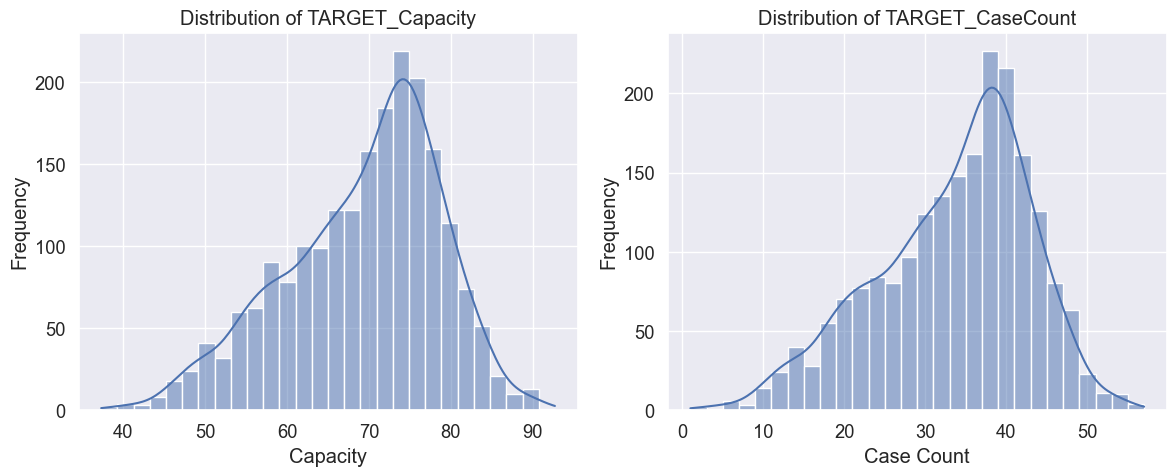

In [27]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['TARGET_Capacity'], kde=True)
plt.title('Distribution of TARGET_Capacity')
plt.xlabel('Capacity')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(data['TARGET_CaseCount'], kde=True)
plt.title('Distribution of TARGET_CaseCount')
plt.xlabel('Case Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- As the next step of EDA ,a correlation matrix is used to identify the features that have the strongest influence on predicting the target variables. 
- It is found that they have identical correlation patterns, and the top three features are FundingDiversityIndex, DatasetDiversityScore, and IntegrationEfficiency, with values approximately 0.66, 0.62, and 0.53 for both target variables. This also explains the similarity in the histograms of both features above.

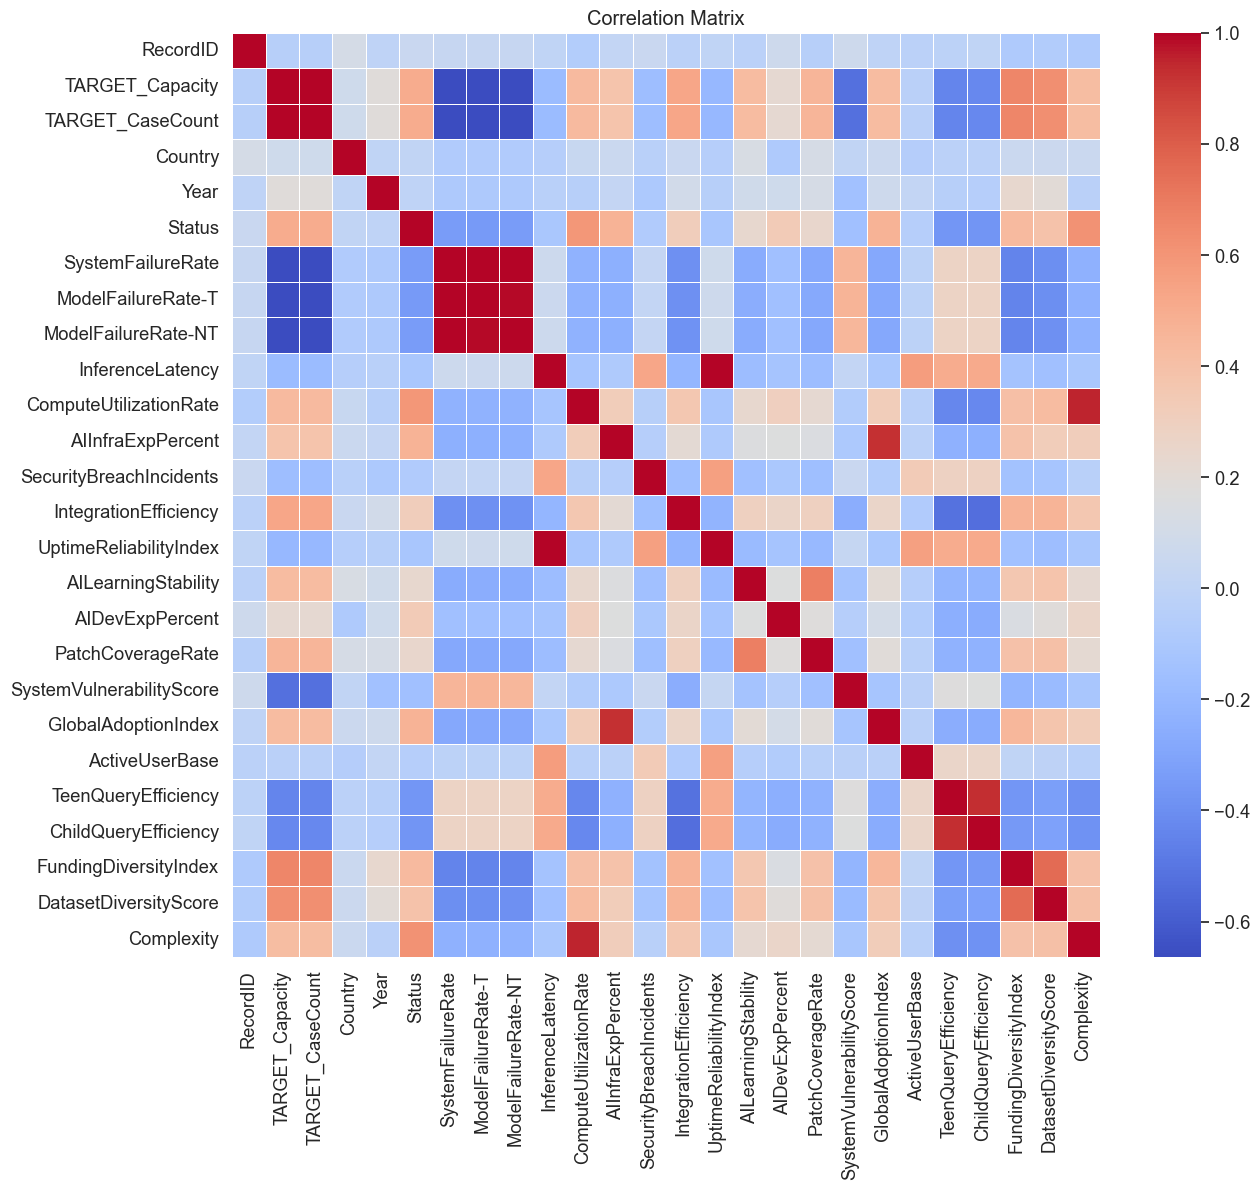

Top 10 Most Correlated Features with Each Target:


,Correlation with TARGET_Capacity,Correlation with TARGET_CaseCount
FundingDiversityIndex,0.659903,0.659297
DatasetDiversityScore,0.624773,0.623920
IntegrationEfficiency,0.531665,0.530174
Status,0.504971,0.504640
PatchCoverageRate,0.457555,0.457783
ComputeUtilizationRate,0.433071,0.432794
GlobalAdoptionIndex,0.427650,0.427843
AILearningStability,0.426012,0.426003
Complexity,0.420652,0.420307
AIInfraExpPercent,0.378189,0.378480


In [31]:
correlation_matrix = data.corr()
from IPython.display import display
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

target_corr_capacity = correlation_matrix['TARGET_Capacity'].sort_values(ascending=False)
target_corr_casecount = correlation_matrix['TARGET_CaseCount'].sort_values(ascending=False)
top_capacity_corr = target_corr_capacity.sort_values(ascending=False).drop(['TARGET_Capacity', 'TARGET_CaseCount']).head(10)
top_casecount_corr = target_corr_casecount.sort_values(ascending=False).drop(['TARGET_Capacity', 'TARGET_CaseCount']).head(10)
comparison_df = pd.concat(
    [top_capacity_corr.rename('Correlation with TARGET_Capacity'),
     top_casecount_corr.rename('Correlation with TARGET_CaseCount')],
    axis=1
)
print("Top 10 Most Correlated Features with Each Target:")
display(comparison_df)


In [33]:
top_features_capacity = target_corr_capacity[1:7].index.tolist()  #top 6 features are selected 
top_features_casecount = target_corr_casecount[1:7].index.tolist()

- Next, we create scatter plots to analyze the behavior of the target variables Capacity and CaseCount. Six scatter plots are created for each to find the relationship between them and the attributes that have the strongest relationship from the correlation matrix. 
- We find that the target variables are highly related and display an extremely strong linear relationship with each other.
- As mentioned previously above, the FundingDiversityIndex and DatasetDiversityScore attributes are the highest correlated features for both, and this is evident from the graphs, showing a positive and linear relationship with both of the target variables. On the other hand, the PatchCoverageRate and IntegrationEfficiency demonstrate  non-linear relationships with both targets.

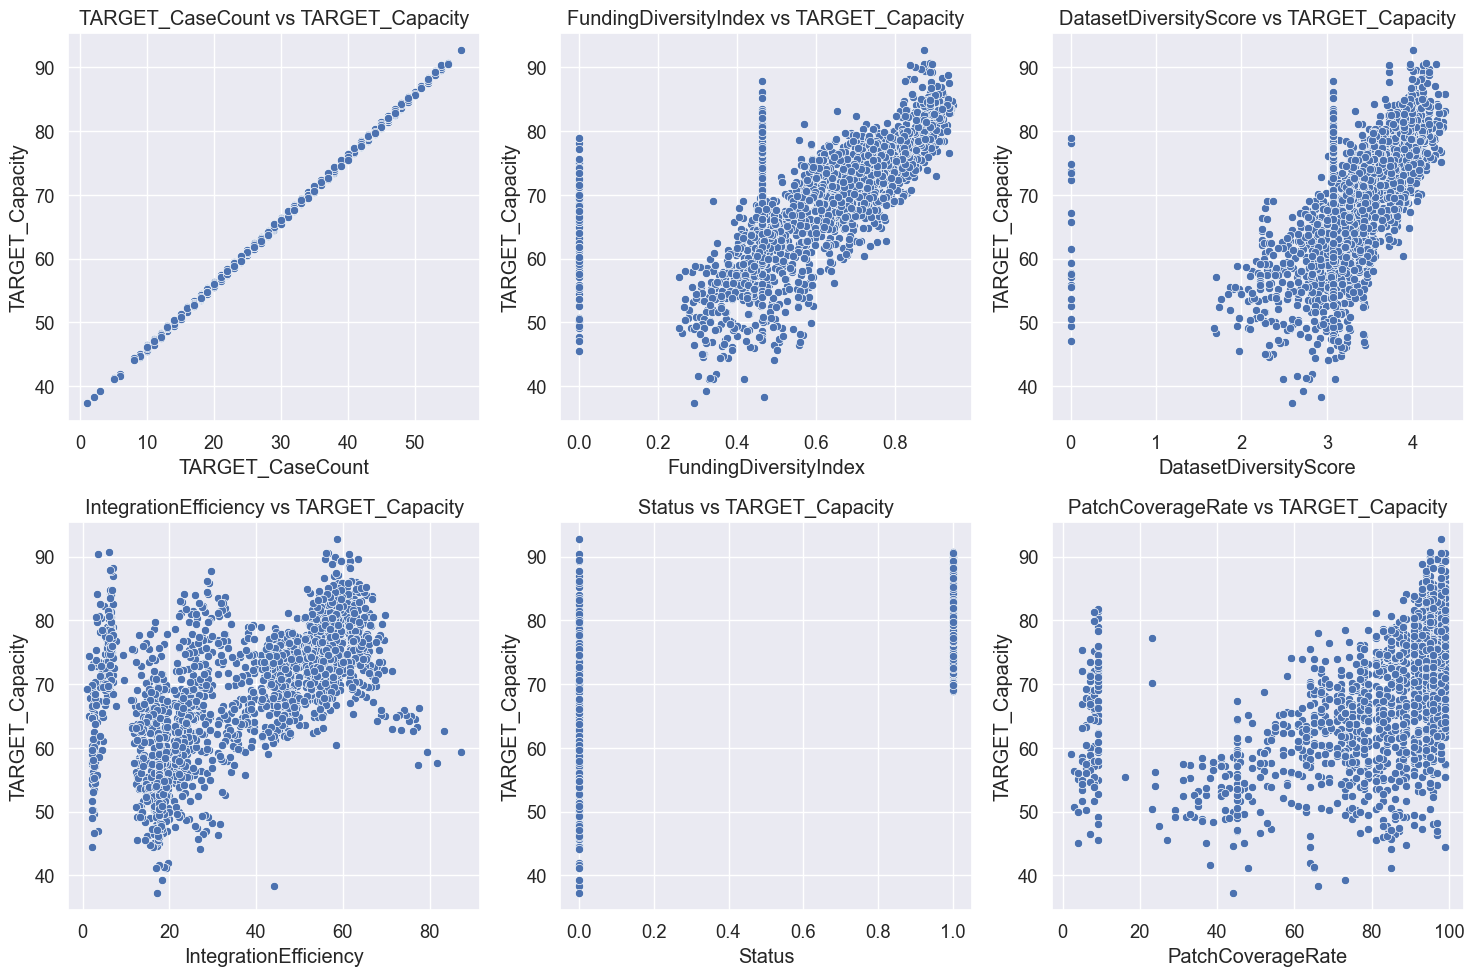

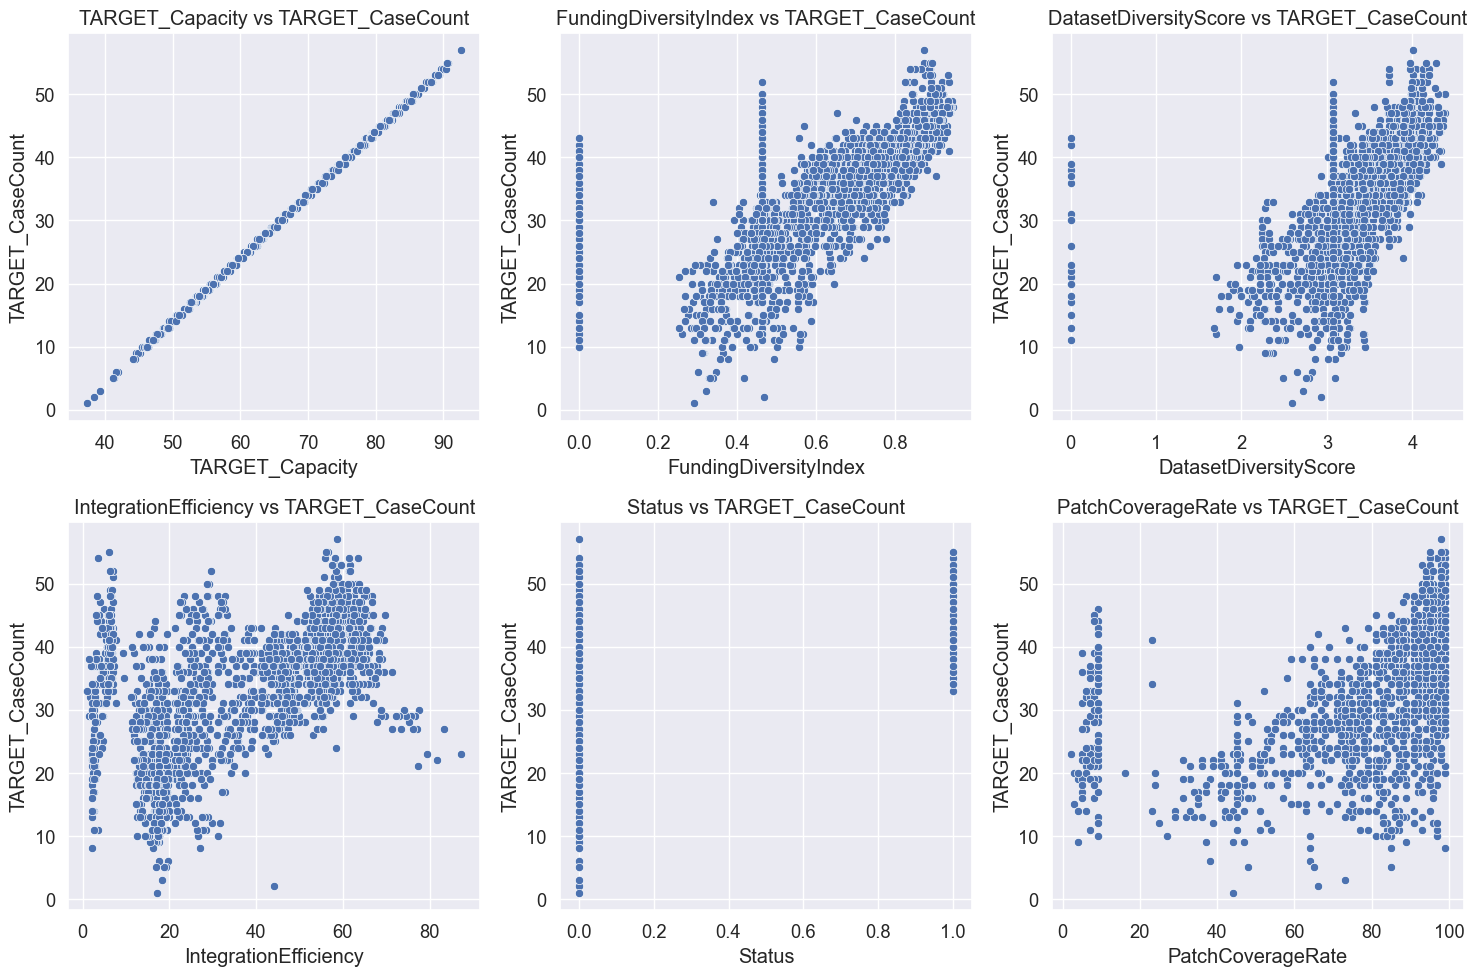

In [35]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features_capacity):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=data[feature], y=data['TARGET_Capacity'])
    plt.title(f'{feature} vs TARGET_Capacity')
    plt.xlabel(feature)
    plt.ylabel('TARGET_Capacity')
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features_casecount):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=data[feature], y=data['TARGET_CaseCount'])
    plt.title(f'{feature} vs TARGET_CaseCount')
    plt.xlabel(feature)
    plt.ylabel('TARGET_CaseCount')
plt.tight_layout()
plt.show()

An attempt to find multicollinearity is made to identify variables with a correlation of more than 0.8, since this can lead to potential errors in predictions.
- The target variables are excluded from the process. The code below recognizes 7 pairs with extremely high correlation. 
- This means that if both variables with high correlation are used, it can lead to redundancy issues in the model.

In [37]:
high_corr_threshold = 0.8
high_corr_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            if colname_i not in ['TARGET_Capacity', 'TARGET_CaseCount'] and colname_j not in ['TARGET_Capacity', 'TARGET_CaseCount']:
                high_corr_features.append((colname_i, colname_j, correlation_matrix.iloc[i, j]))
if high_corr_features:
    print("Features with high correlation:")
    for feat1, feat2, corr in high_corr_features:
        print(f"{feat1} and {feat2}: {corr:.4f}")
else:
    print(f"No high correlations between features found (using threshold of {high_corr_threshold})")

Features with high correlation:
ModelFailureRate-T and SystemFailureRate: 0.9979
ModelFailureRate-NT and SystemFailureRate: 0.9979
ModelFailureRate-NT and ModelFailureRate-T: 0.9916
UptimeReliabilityIndex and InferenceLatency: 0.9969
GlobalAdoptionIndex and AIInfraExpPercent: 0.9225
ChildQueryEfficiency and TeenQueryEfficiency: 0.9305
Complexity and ComputeUtilizationRate: 0.9522


To find out the number of principal components that would help in describing the dataset and reducing dimensionality , a PCA scree plot has been created. 
- On observing the graph below, it can be seen that 30% of the variance is explained by the first component.
- The cumulative variance, on the other hand, shows that approximately 6 components account for 70%, and about 10-12 components are required to explain the complete variance .Hence it can be concluded that , all the components are required to explain the variance.



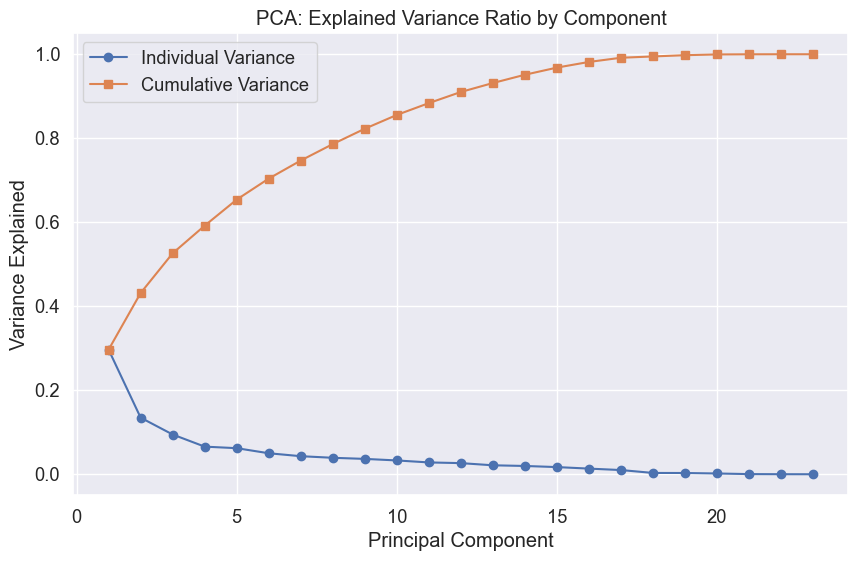

In [39]:

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
features = data.drop(['RecordID', 'TARGET_Capacity', 'TARGET_CaseCount'], axis=1)
features_scaled = StandardScaler().fit_transform(features)
pca = PCA()
pca.fit(features_scaled)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'o-')
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), 's-')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA: Explained Variance Ratio by Component')
plt.legend(['Individual Variance', 'Cumulative Variance'])
plt.grid(True)
plt.show()


## Data Pre- Processing


The code below Drops the RecordId  TARGET_Capacity and  TARGET_CaseCount coloumns from the dataset. A feature matrix X is created. The target variables TARGET_Capacity , TARGET_CaseCount are assigned to  variables y_capacity and y_casecount respectively. Lastly the attributes of the revised dataset are displayed which  would be later used for modelling.

In [41]:
X = data.drop(['RecordID', 'TARGET_Capacity', 'TARGET_CaseCount'], axis=1)
y_capacity = data['TARGET_Capacity']
y_casecount = data['TARGET_CaseCount']
print("Features for modeling:")
print(X.columns.tolist())

Features for modeling:
['Country', 'Year', 'Status', 'SystemFailureRate', 'ModelFailureRate-T', 'ModelFailureRate-NT', 'InferenceLatency', 'ComputeUtilizationRate', 'AIInfraExpPercent', 'SecurityBreachIncidents', 'IntegrationEfficiency', 'UptimeReliabilityIndex', 'AILearningStability', 'AIDevExpPercent', 'PatchCoverageRate', 'SystemVulnerabilityScore', 'GlobalAdoptionIndex', 'ActiveUserBase', 'TeenQueryEfficiency', 'ChildQueryEfficiency', 'FundingDiversityIndex', 'DatasetDiversityScore', 'Complexity']


The dataset "data.csv" is next split into training and testing datasets. To implement this, the train_test_split function from scikit-learn is used. 
- Approximately 80% of the data is part of the training set, as indicated by the number of records displayed below i.e., 1656 , and the testing data contains the remaining 20%, i.e., 415 samples.
- A random_state of 42 has been  used, which ensures the same split is produced every time.
- The target variables were also split in using the same method.
- The dataset was split randomly instead of using manual methods since it ensures no selection bias in the splitting process and that the training and testing datasets represent the overall data distribution, which helps in analyzing the model efficiency better.

In [43]:
#  Split data into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_capacity_train, y_capacity_test = train_test_split(
    X, y_capacity, test_size=0.2, random_state=42)
X_train, X_test, y_casecount_train, y_casecount_test = train_test_split(
    X, y_casecount, test_size=0.2, random_state=42)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)




Training set size: (1656, 23)
Testing set size: (415, 23)


The next step in our data preprocessing entails standardization. This is so becausethe process  ensures all features are on the same scale ,   so that no single feature dominates the model due to larger values and helps make the data more naturally distributed.We implement this by 
- Creation of a StandardScaler object
- Fitting and transforming the data the model will be trained on
- Transformation of test data
- Converting the results back to DataFrames

In [45]:
#standardization (mean=0, std=1)
scaler_S = StandardScaler()
X_train_S = scaler_S.fit_transform(X_train)
X_test_S = scaler_S.transform(X_test)
# converting to dataFrames 
X_train_S_df = pd.DataFrame(X_train_S, columns=X.columns)
X_test_S_df = pd.DataFrame(X_test_S, columns=X.columns)

Standardization is followed by Min-Max normalization. This is done because:

- It ensures that all the features contribute equally by bringing them to the same scale . If one variable has a significantly broader range than the others, it may end up having more effect on the model, which could result in biased predictions.. A MinMaxScaler() object has been used in the code below to achieve this.


In [47]:
#  min-max normalization (values between 0 and 1)
from sklearn.preprocessing import MinMaxScaler
scaler_N = MinMaxScaler()
X_train_N = scaler_N.fit_transform(X_train)
X_test_N = scaler_N.transform(X_test)
# Converting  to DataFrames
X_train_N_df = pd.DataFrame(X_train_N, columns=X.columns)
X_test_N_df = pd.DataFrame(X_test_N, columns=X.columns)

PCA Dimesionality reduction 
- Standardized data has been used to implement PCA since the features have the same scale and the data is centered around 0.
- The dataset dimensions were reduced from 23 features to 14 features due to PCA dimensionality reduction.
- A variance of 95.09% in the data is preserved.
- As evident from the bar graph, there is a pattern of reduced variance after the 5–6 components, representing high collinearity between different attributes, as described above in the EDA section.


PCA reduced dimensions from 23 to 14
Total explained variance: 0.9509


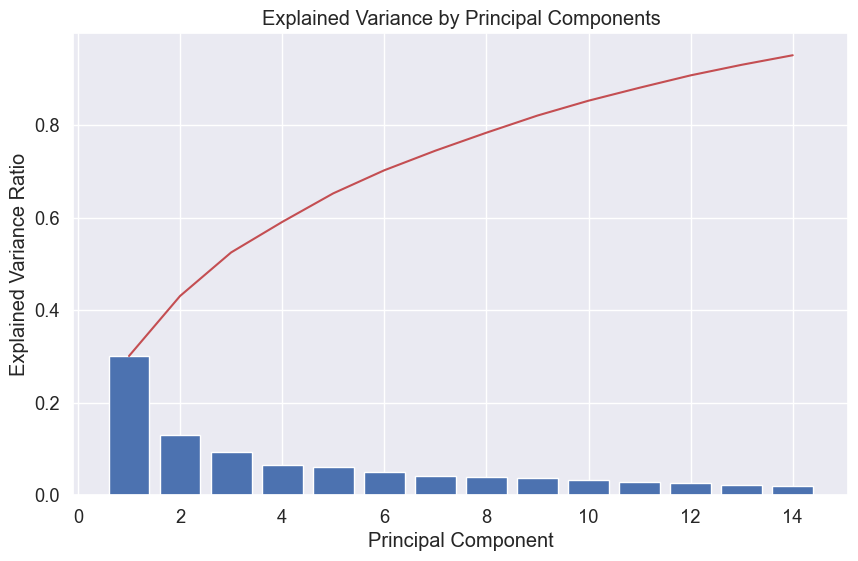

In [172]:
pca = PCA(n_components=0.95)  # components explaining 95% of variance
X_train_pca = pca.fit_transform(X_train_S)
X_test_pca = pca.transform(X_test_S)
n_components = pca.n_components_
explained_variance = pca.explained_variance_ratio_
print(f"\nPCA reduced dimensions from {X_train.shape[1]} to {n_components}")
print(f"Total explained variance: {sum(explained_variance):.4f}")
# examine   explaidgned variance by each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), 'r-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

The information about the different datasets created is listed below. The initial training and testing datasets had 23 features, which have been reduced to 14 features after applying PCA.

In [51]:
print("\nPreprocessed datasets :\n")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"X_train_S (standardized): {X_train_S.shape}")
print(f"X_test_S (standardized): {X_test_S.shape}")
print(f"X_train_N (normalized): {X_train_N.shape}")
print(f"X_test_N (normalized): {X_test_N.shape}")
print(f"X_train_pca: {X_train_pca.shape}")
print(f"X_test_pca: {X_test_pca.shape}")
# Storing  feature names 
feature_names = X.columns


Preprocessed datasets :

X_train: (1656, 23)
X_test: (415, 23)
X_train_S (standardized): (1656, 23)
X_test_S (standardized): (415, 23)
X_train_N (normalized): (1656, 23)
X_test_N (normalized): (415, 23)
X_train_pca: (1656, 14)
X_test_pca: (415, 14)


# Baseline development (Linear regression and Poisson Regression)



The function to evaluate the performance of models has been implemented below. The model performance is evaluated using mainly MSE (Mean Squared Error), RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R² (Coefficient of Determination). The reasons for selecting each of them are given below:

- MSE is used since it accurately measures the squared difference between the true values and the predicted records. It places a strong cost on large errors . The lower the MSE, the better the model is considered.

- RMSE makes it easier to understand the prediction by using the same unit as the target variable since it is the square root of MSE .

- MAE calculates the average absolute difference between the predicted and actual values.

- R² does not depend on the scale and gives a value between 0 and 1, indicating the percentage of variance explained by the model. The higher it is, the better the model is considered.

In [53]:
# Function to evaluate regression models
def evaluate_model(y_true, y_pred, model_name="Model"):
    """Evaluate regression model performance using multiple metrics."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print("-" * 40)
    
    return {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    }


## MODEL 1: Linear Regression Baseline (No PCA)

- The model is a good baseline because it is the simplest model and assumes a linear relationship between the dependent variable and independent variables. Linear regression is chosen since the target_Capacity has continuos data instead of count dat.
- To ensure no bias due to some features having larger values in the datasets, the standardized training and testing datasets were used. This ensures all predictors contribute equally to the model.
- The R² value also demonstrates that the model is able to account for approximately 72% of the variability in the target variable.
- The RMSE value also indicates that the error in prediction, on average, is 4.8 units.
- The graph also demonstrates a strong linear relationship, and this is a good baseline model since it doesn't use PCA and helps us analyze the relationships of all the predictors with the target variables.


===== TARGET_Capacity: Linear Regression Baseline (Standardized data, No PCA) =====
Linear Regression (Standardized) Performance:
MSE: 23.1488
RMSE: 4.8113
MAE: 3.6794
R²: 0.7198
----------------------------------------


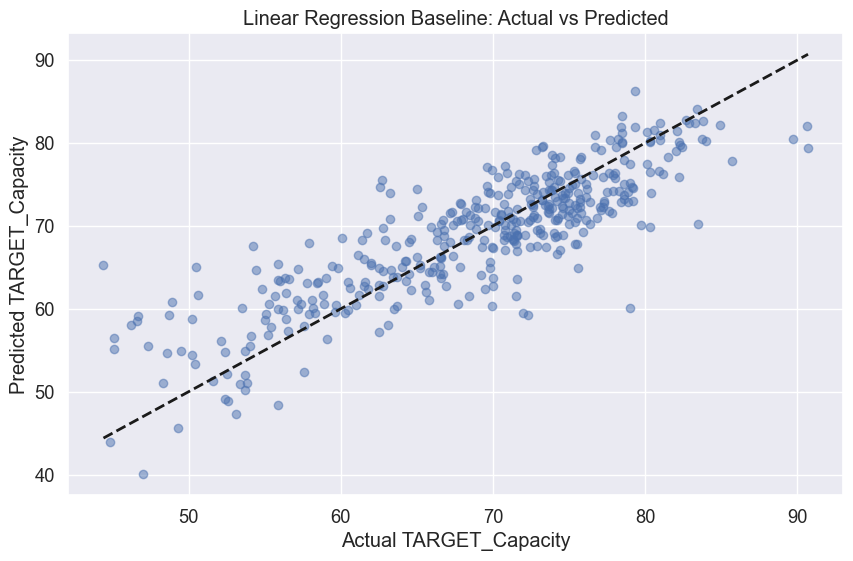

In [55]:
# MODEL 1: Linear Regression Baseline (No PCA)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("\n===== TARGET_Capacity: Linear Regression Baseline (Standardized data, No PCA) =====")
lr_capacity = LinearRegression()
lr_capacity.fit(X_train_S, y_capacity_train)

# Make predictions
y_capacity_train_pred_lr = lr_capacity.predict(X_train_S)
y_capacity_test_pred_lr = lr_capacity.predict(X_test_S)

# Evaluate model
lr_metrics = evaluate_model(y_capacity_test, y_capacity_test_pred_lr, "Linear Regression (Standardized)")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_capacity_test, y_capacity_test_pred_lr, alpha=0.5)
plt.plot([y_capacity_test.min(), y_capacity_test.max()], [y_capacity_test.min(), y_capacity_test.max()], 'k--', lw=2)
plt.xlabel('Actual TARGET_Capacity')
plt.ylabel('Predicted TARGET_Capacity')
plt.title('Linear Regression Baseline: Actual vs Predicted')
plt.show()

## MODEL 2: Polynomial Regression Baseline (No PCA) 

- Although there was a strong relationship in Model 1 using Linear Regression, the model does not account for non-linear relationships. Therefore, a Polynomial Regression model (without PCA) was used to better understand curved relationships among the independent variables.
  
- This helps in recognizing interactions between different patterns, which can result in identifying key combined relationships between variables.

  
- The error analysis clearly shows an increase in the R² value to 0.8349, indicating that the model’s prediction accuracy increased by approximately 11%.

- The RMSE value decreased by approximately 23% to 3.6935, indicating that the predictive performance of Model 2 is better than Model 1.
  
- The graph clearly supports the error analysis, showing a tighter clustering along the diagonal reference line compared to the previous model — suggesting that significant non-linear relationships were successfully captured.




===== TARGET_Capacity: Polynomial Regression (Standardized data, No PCA) =====
Polynomial Regression (Standardized) Performance:
MSE: 13.6421
RMSE: 3.6935
MAE: 2.7261
R²: 0.8349
----------------------------------------


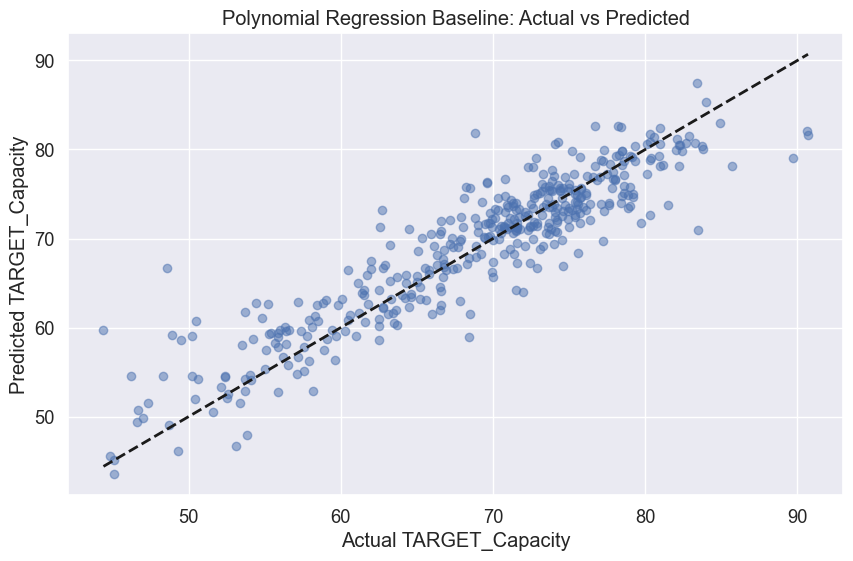

In [57]:
# MODEL 2: Polynomial Regression Baseline (No PCA)
print("\n===== TARGET_Capacity: Polynomial Regression (Standardized data, No PCA) =====")
# Create and train polynomial regression model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_S)
X_test_poly = poly.transform(X_test_S)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_capacity_train)

# Make predictions
y_capacity_train_pred_poly = poly_reg.predict(X_train_poly)
y_capacity_test_pred_poly = poly_reg.predict(X_test_poly)

# Evaluate model
poly_metrics = evaluate_model(y_capacity_test, y_capacity_test_pred_poly, "Polynomial Regression (Standardized)")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_capacity_test, y_capacity_test_pred_poly, alpha=0.5)
plt.plot([y_capacity_test.min(), y_capacity_test.max()], [y_capacity_test.min(), y_capacity_test.max()], 'k--', lw=2)
plt.xlabel('Actual TARGET_Capacity')
plt.ylabel('Predicted TARGET_Capacity')
plt.title('Polynomial Regression Baseline: Actual vs Predicted')
plt.show()

## MODEL 3:Linear Regression with PCA

- Next, we have the Linear Regression Model with PCA. The rationale behind using PCA in the model is to focus on the minimum number of features that explain the maximum variance. This is because many features in the dataset were correlated. If PCA is not used, it might lead to overfitting the model. As a result, the model would perform well on the dataset but poorly on unseen or real-world data, reducing its accuracy.

- Since we only focus on the most significant principal components, a more parsimonious model is created.

- At the same time, a model without PCA, using all independent variables, requires more computational power.

- Analyzing the results, it is seen that there has been a dip in the value of  R² to 0.7019, which is the lowest among all three models.

- The RMSE value is the highest compared to the previous models.

- It can be concluded that some predictive information was lost during the PCA transformation, resulting in a model that explains less variance overall.

Linear Regression (with PCA) Performance:
MSE: 24.6281
RMSE: 4.9627
MAE: 3.7561
R²: 0.7019
----------------------------------------


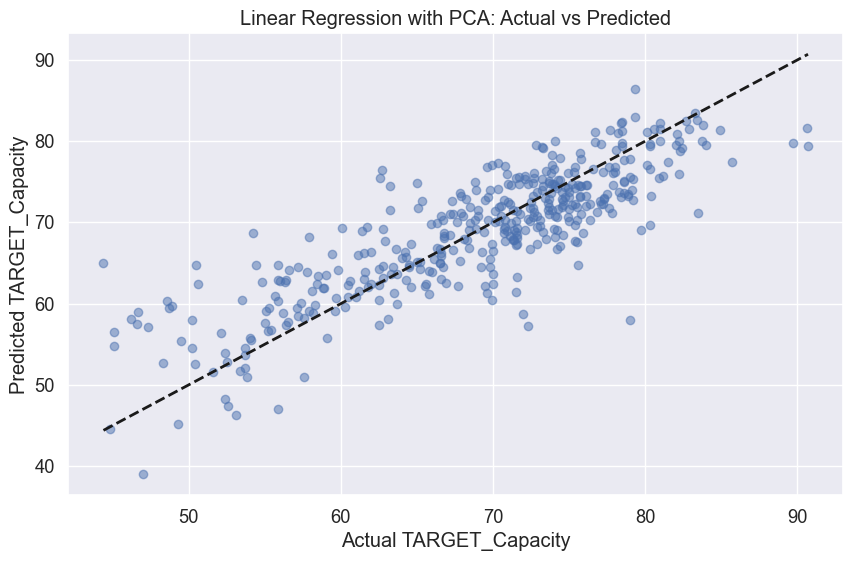

In [59]:
# MODEL 3:Linear Regression with PCA
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_capacity_train)

# Make predictions
y_capacity_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_capacity_test_pred_lr_pca = lr_pca.predict(X_test_pca)

# Evaluate model
lr_pca_metrics = evaluate_model(y_capacity_test, y_capacity_test_pred_lr_pca, "Linear Regression (with PCA)")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_capacity_test, y_capacity_test_pred_lr_pca, alpha=0.5)
plt.plot([y_capacity_test.min(), y_capacity_test.max()], [y_capacity_test.min(), y_capacity_test.max()], 'k--', lw=2)
plt.xlabel('Actual TARGET_Capacity')
plt.ylabel('Predicted TARGET_Capacity')
plt.title('Linear Regression with PCA: Actual vs Predicted')
plt.show()

## MODEL 4: Ridge Regression (L2 Regularization) 
- With Linear Regression, when there are independent variables with high collinearity, it is highly likely that the coefficient estimates generated might be unreliable.

- Using Ridge, on the other hand, the objective function includes a regularization (constraint) term 
 α∑β², which further restricts the weight values near 0. This ensures that the model is not overfitted and remains stable.

- This approach is used to also  handle multicollinearity, similar to PCA. However, PCA creates components that aren't related to each other, and Ridge is used to regularize these components.

- Furthermore, GridSearchCV has been used to perform hyperparameter tuning with 5-fold cross-validation, which tests each alpha value.

- For each fold, the model was trained on 80% of the training data and then tested on the remaining 20% of the test data. The results of the model on the test data are evaluated using negative mean squared error to minimize prediction errors.

- This process continued for each alpha value, and at the last step, 0.01 alpha was selected as the optimal alpha, indicating that only mild regularization is needed, and the model wasn't excessively overfitting from the start.

- This model, however, doesn't recognize the non-linear relationships, similar to Model 2, and only maintains the linear structure, but with constrained coefficients.

- The R² and RMSE vaue show  very slight improvement over the baseline linear model .



===== TARGET_Capacity: Ridge Regression (L2 Regularization) =====
Best Ridge alpha: 0.01
Ridge Regression (L2) Performance:
MSE: 23.1245
RMSE: 4.8088
MAE: 3.6702
R²: 0.7201
----------------------------------------


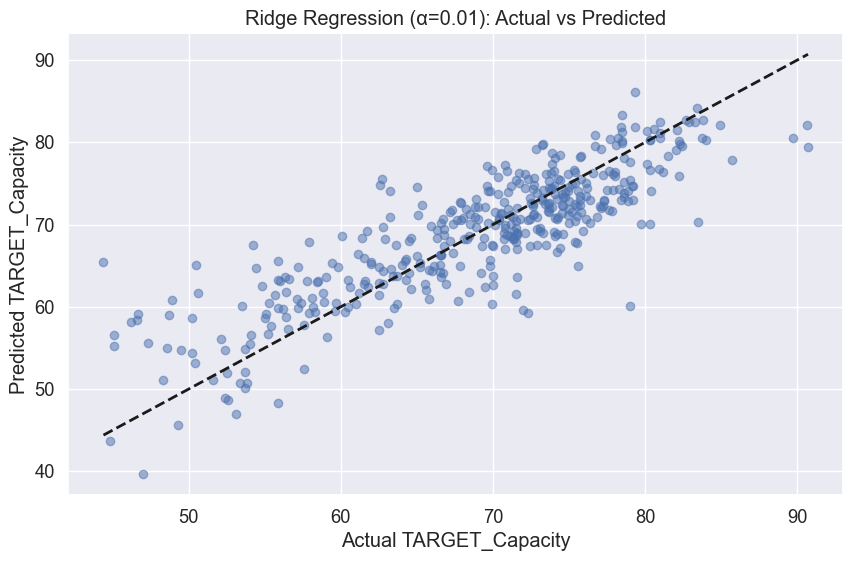

In [170]:
# MODEL 4: Ridge Regression (L2 Regularization)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

print("\n===== TARGET_Capacity: Ridge Regression (L2 Regularization) =====")

#  parameter grid for Ridge
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Set up Grid Search with cross-validation
ridge_grid = GridSearchCV(
    Ridge(),
    ridge_params,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

# train model
ridge_grid.fit(X_train_S, y_capacity_train)
# best parameters
best_alpha = ridge_grid.best_params_['alpha']
print(f"Best Ridge alpha: {best_alpha}")
# Train final model with best parameters
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_S, y_capacity_train)
# Make predictions
y_capacity_train_pred_ridge = ridge_best.predict(X_train_S)
y_capacity_test_pred_ridge = ridge_best.predict(X_test_S)

# Evaluate model
ridge_metrics = evaluate_model(y_capacity_test, y_capacity_test_pred_ridge, "Ridge Regression (L2)")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_capacity_test, y_capacity_test_pred_ridge, alpha=0.5)
plt.plot([y_capacity_test.min(), y_capacity_test.max()], [y_capacity_test.min(), y_capacity_test.max()], 'k--', lw=2)
plt.xlabel('Actual TARGET_Capacity')
plt.ylabel('Predicted TARGET_Capacity')
plt.title(f'Ridge Regression (α={best_alpha}): Actual vs Predicted')
plt.show()


## MODEL 5: Regularized Polynomial Regression 
- polynomial regression, as mentioned previously, helps identify relationships between features that are non-linear and therefore cannot be captured by linear regression. However, one of the major issues with polynomial regression is overfitting. To address this, regularization is used to keep the parameters near zero and prevent them from becoming extremely large. Large coefficients may work well on training data but often fail on unseen data.

- To achieve this, a pipeline is used that combines the two processes. In this, the training dataset is first transformed using polynomial regression, and then regularization is applied.

- The model tests different polynomial degrees ( degrees 1, 2, and 3) to find the best level of complexity.

- It also tests different alpha values ,ranging from very small such as 0.001  to larger values (10.0).

- It is found that the best polynomail degree is 2 and the best alpha parameter is 10 .


===== TARGET_Capacity: Regularized Polynomial Regression =====
Best polynomial degree: 2
Best Ridge alpha: 10.0
Polynomial Ridge (degree=2, α=10.0) Performance:
MSE: 13.9288
RMSE: 3.7321
MAE: 2.7889
R²: 0.8314
----------------------------------------


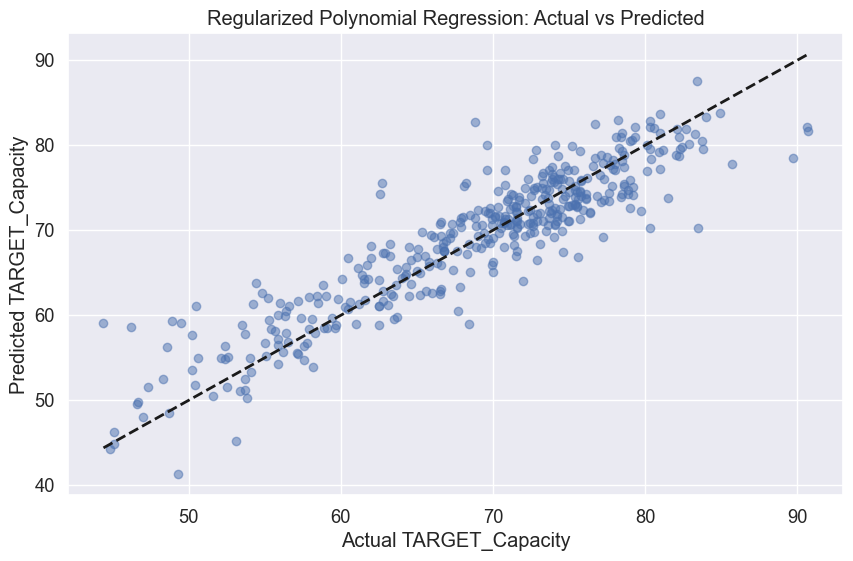

In [142]:
# MODEL 5: Regularized Polynomial Regression
from sklearn.pipeline import Pipeline
print("\n===== TARGET_Capacity: Regularized Polynomial Regression =====")

# create pipeline with polynomial features and Ridge regression
poly_ridge_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

# define parameter grid
poly_ridge_params = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Set up Grid Search
poly_ridge_grid = GridSearchCV(
    poly_ridge_pipeline,
    poly_ridge_params,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

# Train model
poly_ridge_grid.fit(X_train_S, y_capacity_train)

# Get best parameters
best_poly_degree = poly_ridge_grid.best_params_['poly__degree']
best_poly_ridge_alpha = poly_ridge_grid.best_params_['ridge__alpha']
print(f"Best polynomial degree: {best_poly_degree}")
print(f"Best Ridge alpha: {best_poly_ridge_alpha}")

# Creatihg best model
best_poly_ridge = Pipeline([
    ('poly', PolynomialFeatures(degree=best_poly_degree)),
    ('ridge', Ridge(alpha=best_poly_ridge_alpha))
])
best_poly_ridge.fit(X_train_S, y_capacity_train)

# Make predictions
y_capacity_train_pred_poly_ridge = best_poly_ridge.predict(X_train_S)
y_capacity_test_pred_poly_ridge = best_poly_ridge.predict(X_test_S)

# Evaluate model
poly_ridge_metrics = evaluate_model(y_capacity_test, y_capacity_test_pred_poly_ridge, f"Polynomial Ridge (degree={best_poly_degree}, α={best_poly_ridge_alpha})")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_capacity_test, y_capacity_test_pred_poly_ridge, alpha=0.5)
plt.plot([y_capacity_test.min(), y_capacity_test.max()], [y_capacity_test.min(), y_capacity_test.max()], 'k--', lw=2)
plt.xlabel('Actual TARGET_Capacity')
plt.ylabel('Predicted TARGET_Capacity')
plt.title(f'Regularized Polynomial Regression: Actual vs Predicted')
plt.show()

From the metics it is evident that the Polynomial Regression (Standardized)  can be seen as  the best model while Linear Regression (with PCA) has the lowest value of R² and highest values of  RMSE and. MAE 


TARGET_Capacity Model Comparison:
                                            MSE      RMSE       MAE        R²
Polynomial Regression (Standardized)  13.642098  3.693521  2.726078  0.834883
Polynomial Ridge (deg=2)              13.928843  3.732137  2.788929  0.831413
Ridge Regression (L2)                 23.124530  4.808797  3.670178  0.720113
Linear Regression (Standardized)      23.148831  4.811323  3.679367  0.719819
Linear Regression (with PCA)          24.628116  4.962672  3.756090  0.701914


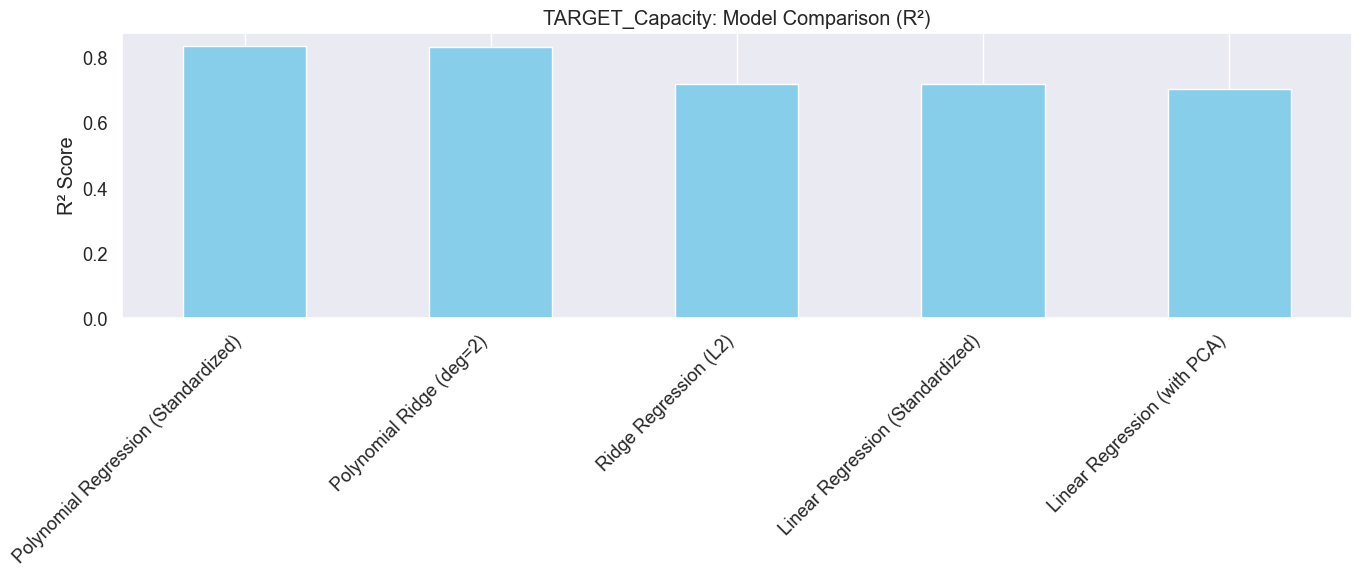

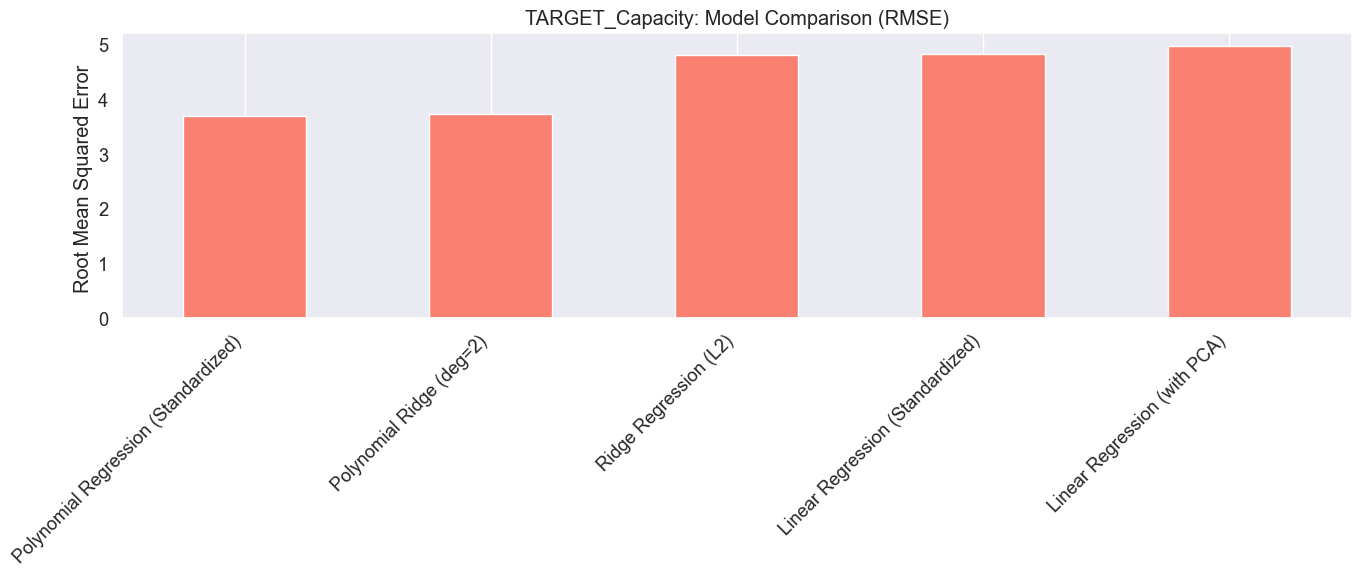

In [140]:
# Compare all models
capacity_models = {
    'Linear Regression (Standardized)': lr_metrics,
    'Polynomial Regression (Standardized)': poly_metrics,
    'Linear Regression (with PCA)': lr_pca_metrics,
    'Ridge Regression (L2)': ridge_metrics,
    f'Polynomial Ridge (deg={best_poly_degree})': poly_ridge_metrics
}

capacity_comparison = pd.DataFrame(capacity_models)

#  comparison
print("\nTARGET_Capacity Model Comparison:")
print(capacity_comparison.T.sort_values('R²', ascending=False))

# Visualize model comparison
plt.figure(figsize=(14, 6))
capacity_comparison.T.sort_values('R²', ascending=False)['R²'].plot(kind='bar', color='skyblue')
plt.title('TARGET_Capacity: Model Comparison (R²)')
plt.ylabel('R² Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
capacity_comparison.T.sort_values('RMSE')['RMSE'].plot(kind='bar', color='salmon')
plt.title('TARGET_Capacity: Model Comparison (RMSE)')
plt.ylabel('Root Mean Squared Error ')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# TARGET_CaseCount Models

## MODEL 1: Poisson Regression Baseline (No PCA, Standardized data)

- Since we are dealing with non-negative integers instead of continuous values (as in the TARGET_Capacity variable), a Poisson regression model is used here.

- Similar to the baseline model for TARGET_Capacity Linear Regression Baseline Model, this is the baseline model which doesn't use any PCA and uses standardized features. This allows us to understand the relationship of original features with the target variable better.

- At the same time, since the original attributes are being used, this means it will be extremely beneficial in drawing comparisons with future models, which will include compression through PCA and parameter tuning — helping in making fair evaluations.

- The model can explain a variance of 0.73 and  the model's predictions is nearly off by 4.7 units . 


===== TARGET_CaseCount: Poisson Regression Baseline (Standardized data, No PCA) =====
Poisson Regression (Standardized) Performance:
MSE: 22.0554
RMSE: 4.6963
MAE: 3.6120
R²: 0.7334
----------------------------------------


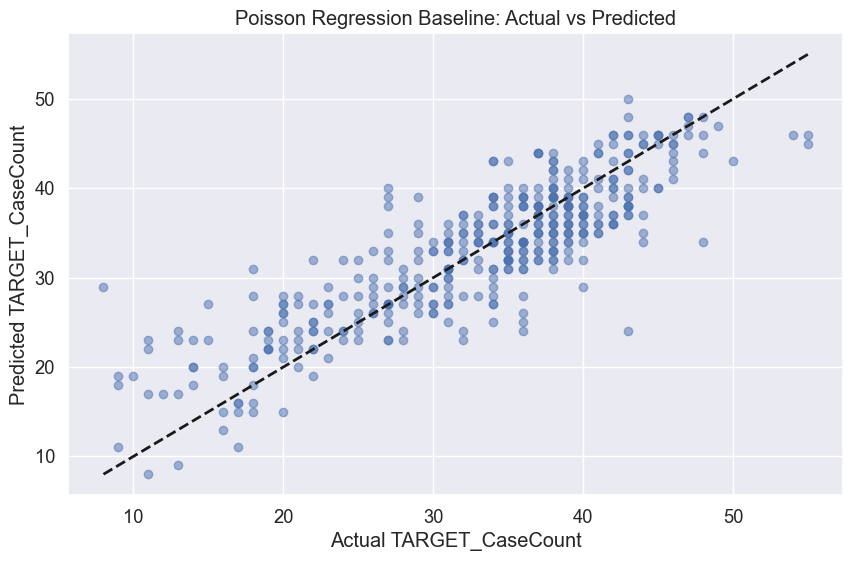

In [89]:
# MODEL 1: Poisson Regression Baseline (No PCA, Standardized data)
import statsmodels.api as sm
print("\n===== TARGET_CaseCount: Poisson Regression Baseline (Standardized data, No PCA) =====")

# Add constant for statsmodels
X_train_S_sm = sm.add_constant(X_train_S)
X_test_S_sm = sm.add_constant(X_test_S)

# Fit Poisson regression model
poisson_model = sm.GLM(y_casecount_train, X_train_S_sm, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

# Make predictions
y_casecount_train_pred_poisson = poisson_results.predict(X_train_S_sm)
y_casecount_test_pred_poisson = poisson_results.predict(X_test_S_sm)

# Round predictions to nearest integer (since we're dealing with counts)
y_casecount_train_pred_poisson_rounded = np.round(y_casecount_train_pred_poisson)
y_casecount_test_pred_poisson_rounded = np.round(y_casecount_test_pred_poisson)

# Evaluate model
poisson_metrics = evaluate_model(y_casecount_test, y_casecount_test_pred_poisson_rounded, "Poisson Regression (Standardized)")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_casecount_test, y_casecount_test_pred_poisson_rounded, alpha=0.5)
plt.plot([y_casecount_test.min(), y_casecount_test.max()], [y_casecount_test.min(), y_casecount_test.max()], 'k--', lw=2)
plt.xlabel('Actual TARGET_CaseCount')
plt.ylabel('Predicted TARGET_CaseCount')
plt.title('Poisson Regression Baseline: Actual vs Predicted')
plt.grid(True)
plt.show()

## MODEL 2: Poisson Regression with PCA and Parameter Tuning

- This model combines Poisson Regression with PCA and Parameter Tuning. These are useful for minimizing dimensionality and preventing overfitting of the model on the training data, especially in cases of highly collinear features.
- I implemented this by creating a function that first standardizes the training and testing data. Next, PCA is applied to the standardized datasets, the Poisson Regression model is fitted, and finally, the results are evaluated.
- I followed a variance-based PCA approach, where I tested predefined thresholds of variance with evaluation metrics to get a better understanding, which results  in selecting the optimal hyperparameter  to improve the performance of the model.
-  It was found that 95% variance with PCA gave the highest R² and lowest MAE, which means this combination retains the key information required for better prediction and also reduces dimensionality, making the model more efficient by saving computational power



In [116]:
# MODEL 2: Poisson Regression with PCA and Parameter Tuning
print("\n===== TARGET_CaseCount: Poisson Regression with PCA and Parameter Tuning =====")

#  function to fit Poisson regression with different PCA components
def fit_poisson_with_pca(X_train, y_train, X_test, y_test, n_components):
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(StandardScaler().fit_transform(X_train))
    X_test_pca = pca.transform(StandardScaler().fit_transform(X_test))
    
    # Add constant for statsmodels
    X_train_pca_sm = sm.add_constant(X_train_pca)
    X_test_pca_sm = sm.add_constant(X_test_pca)
    
    # Fit Poisson regression
    model = sm.GLM(y_train, X_train_pca_sm, family=sm.families.Poisson())
    results = model.fit()
    
    # Make predictions
    y_pred = results.predict(X_test_pca_sm)
    y_pred_rounded = np.round(y_pred)
    
    # Evaluate
    metrics = {
        'MSE': mean_squared_error(y_test, y_pred_rounded),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rounded)),
        'MAE': mean_absolute_error(y_test, y_pred_rounded),
        'R²': r2_score(y_test, y_pred_rounded)
    }
    
    return results, y_pred_rounded, metrics

# Test PCA component values
pca_components_to_test = [0.8, 0.85, 0.9, 0.95]
poisson_pca_results = {}

for components in pca_components_to_test:
    print(f"\nTesting PCA with {components} explained variance")
    model, predictions, metrics = fit_poisson_with_pca(
        X_train, y_casecount_train,
        X_test, y_casecount_test,
        components
    )
    poisson_pca_results[f'PCA_{components}'] = {
        'model': model,
        'predictions': predictions,
        'metrics': metrics
    }
    print(f"R² score: {metrics['R²']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")





===== TARGET_CaseCount: Poisson Regression with PCA and Parameter Tuning =====

Testing PCA with 0.8 explained variance
R² score: 0.6266
MAE: 4.0627

Testing PCA with 0.85 explained variance
R² score: 0.6488
MAE: 4.0217

Testing PCA with 0.9 explained variance
R² score: 0.6772
MAE: 3.9036

Testing PCA with 0.95 explained variance
R² score: 0.7126
MAE: 3.7205


- As shown Poisson Regression (No PCA) is the better model out of the the two proposed models for target Variable ,Target_CaseCount .


TARGET_CaseCount Model Comparison:
                                     MSE      RMSE       MAE        R²
Poisson Regression (No PCA)    22.055422  4.696320  3.612048  0.733438
Poisson Regression (with PCA)  23.783133  4.876795  3.720482  0.712557


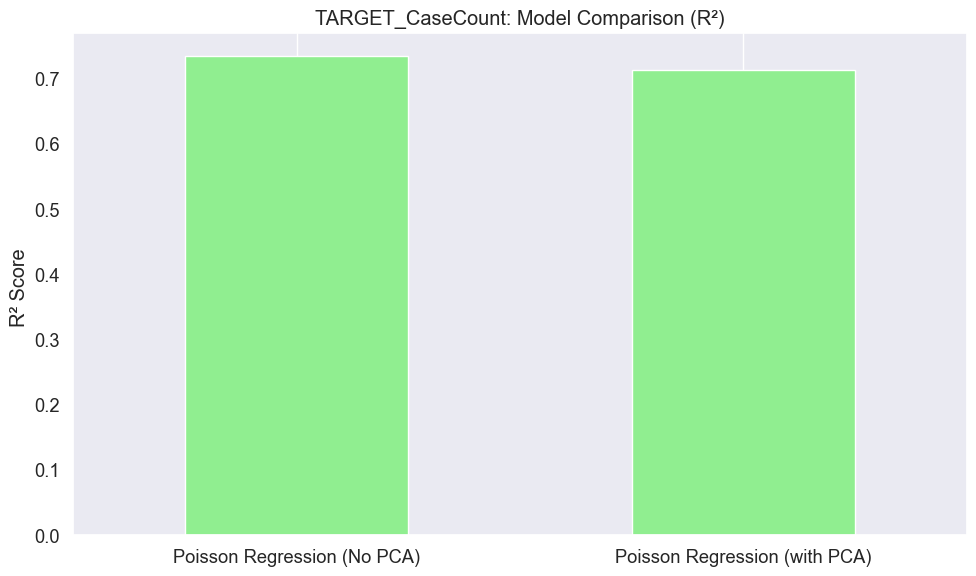

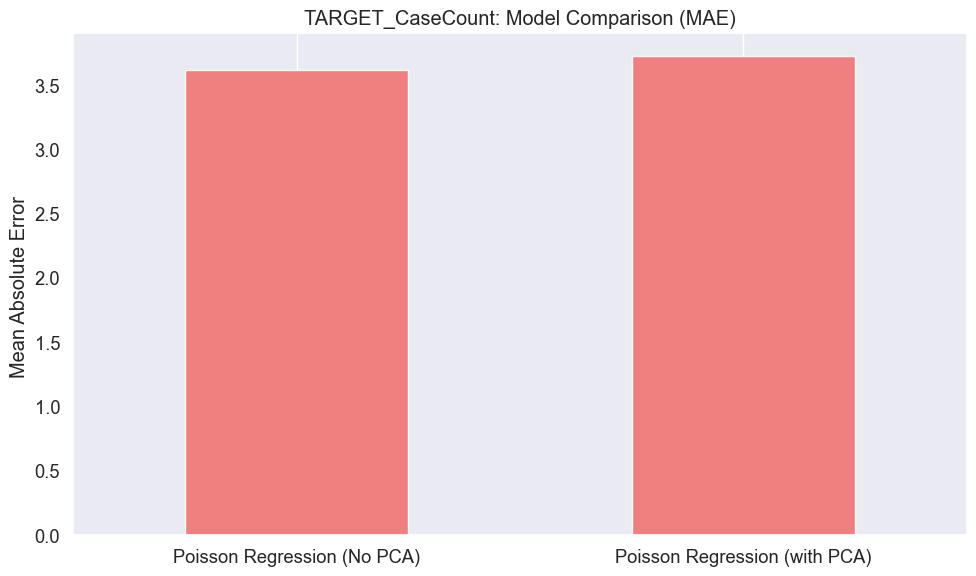

In [136]:


# Compare models for TARGET_CaseCount
casecount_models = {
    'Poisson Regression (No PCA)': poisson_metrics,
    'Poisson Regression (with PCA)': best_poisson_pca_metrics
}
casecount_comparison = pd.DataFrame(casecount_models)

# comparison
print("\nTARGET_CaseCount Model Comparison:")
print(casecount_comparison.T)

# Visualize model comparison
plt.figure(figsize=(10, 6))
casecount_comparison.T['R²'].plot(kind='bar', color='lightgreen')
plt.title('TARGET_CaseCount: Model Comparison (R²)')
plt.ylabel('R² Score ')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.show()

plt.figure(figsize=(10, 6))
casecount_comparison.T['MAE'].plot(kind='bar', color='lightcoral')
plt.title('TARGET_CaseCount: Model Comparison (MAE)')
plt.ylabel('Mean Absolute Error ')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



 # Final Predictions on Eval.csv

## Final Judjemnet 
###  TARGET_Capacity
As shown  by the evaluation metrics , polynomial Regression (Standardized) has the lowest error metrics (MSE: 13.64, RMSE: 3.69, MAE: 2.73) and highest R² value 0.834 . However, I  choose   Polynomial Ridge (degree=2) as the  most efficient model despite slightly lower performance (R²: 0.831 )because it provides better generalization through regularization, balancing model complexity with performance and reduces the risk of overfitting .

### TARGET_CaseCount
Similar to Traget_Capacity I  have decided to go with Poisson Regression with PCA (95% variance) for TARGET_CaseCount prediction despite having  slightly lower value for R² . Although the standard Poisson model shows better test results , my PCA approach reduces dimensionality and creates uncorrelated features, addressing potential multicollinearity.Thismodel  should generalize better to new data than the standard Poisson model which might overfit. This approach effectively balances model complexity with performance as required.



In [168]:
# Load evaluation dataset
print("\n===== Generating Predictions on Eval.csv Dataset =====")
eval_data = pd.read_csv('Eval.csv')

# Separate features and target variables in the training data
X = data.drop(['TARGET_Capacity', 'TARGET_CaseCount'], axis=1)
y_capacity = data['TARGET_Capacity']
y_casecount = data['TARGET_CaseCount']

# Prepare evaluation data (same preprocessing as training data)
X_eval = eval_data.copy()

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_eval_standardized = scaler.transform(X_eval)

# MODEL 1: Polynomial Ridge (deg=2) for TARGET_Capacity
print("Training Polynomial Ridge (deg=2) for TARGET_Capacity...")
poly_ridge = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=10.0))  
])
poly_ridge.fit(X_standardized, y_capacity)

# Make predictions for TARGET_Capacity
eval_capacity_predictions = poly_ridge.predict(X_eval_standardized)

# MODEL 2: Poisson Regression with PCA for TARGET_CaseCount
print("Training Poisson Regression with PCA for TARGET_CaseCount...")
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_standardized)
X_eval_pca = pca.transform(X_eval_standardized)

#  constant for statsmodels
X_pca_sm = sm.add_constant(X_pca)
X_eval_pca_sm = sm.add_constant(X_eval_pca)

# Fit Poisson regression model
poisson_model = sm.GLM(y_casecount, X_pca_sm, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

# p redictions for TARGET_CaseCount
eval_casecount_predictions = poisson_results.predict(X_eval_pca_sm)
# Round predictions to nearest integer 
eval_casecount_predictions_rounded = np.round(eval_casecount_predictions)

# new DataFrame with the predictions
eval_with_predictions = eval_data.copy()
eval_with_predictions['TARGET_Capacity'] = eval_capacity_predictions
eval_with_predictions['TARGET_CaseCount'] = eval_casecount_predictions_rounded

# Save to CSV
eval_with_predictions.to_csv('eval_2_with_predictions.csv', index=False)


print("Predictions saved to 'eval_2_with_predictions.csv'")


===== Generating Predictions on Eval.csv Dataset =====
Training Polynomial Ridge (deg=2) for TARGET_Capacity...
Training Poisson Regression with PCA for TARGET_CaseCount...
Predictions saved to 'eval_2_with_predictions.csv'
